In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go


In [144]:
df = pd.read_csv('Disability_and_Health_Data_System__DHDS_.csv')
df.head()

/var/folders/d1/wfvvsnzn189_xtqn2nlz3cjr0000gn/T/ipykernel_2890/809097713.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,Rowid,Year,LocationAbbr,LocationDesc,DataSource,Category,Indicator,Response,Data_Value_Unit,Data_Value_Type,...,CategoryID,IndicatorID,Geolocation,LocationID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2016~1~JOB04~JOB~DISTYPE~SELFDIS~~~~,2016,AL,Alabama,BRFSS,Demographics,Employment status among adults 18 years of age...,Other,%,Age-adjusted Prevalence,...,DEMOG,JOB,NaN,1,JOB04,AGEADJPREV,DISTYPE,SELFDIS,NaN,NaN
1,2016~11~YESNO01~UTDCERV~DISTYPE~COGDIS~~~~,2016,DC,District of Columbia,BRFSS,Prevention & Screenings,Up-to-date cervical cancer screening among fem...,Yes,%,Prevalence,...,PREVENT,UTDCERV,NaN,11,YESNO01,PREV,DISTYPE,COGDIS,NaN,NaN
2,2016~11~JOB03~JOB~DISTYPE~HEARDIS~~~~,2016,DC,District of Columbia,BRFSS,Demographics,Employment status among adults 18 years of age...,Unable to Work,%,Age-adjusted Prevalence,...,DEMOG,JOB,NaN,11,JOB03,AGEADJPREV,DISTYPE,HEARDIS,NaN,NaN
3,2016~13~JOB03~JOB~DISSTAT~DISABL~~~~,2016,GA,Georgia,BRFSS,Demographics,Employment status among adults 18 years of age...,Unable to Work,%,Age-adjusted Prevalence,...,DEMOG,JOB,NaN,13,JOB03,AGEADJPREV,DISSTAT,DISABL,NaN,NaN
4,2016~66~YESNO02~STROKE~DISSTAT~DISABL~AGEGRP~A...,2016,GU,Guam,BRFSS,Chronic Conditions,Ever had a stroke among adults 18 years of age...,No,%,Prevalence,...,CHRCOND,STROKE,NaN,66,YESNO02,PREV,DISSTAT,DISABL,AGEGRP,AGE01


In [145]:
df = df.sort_values(by='ResponseID',ascending=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545540 entries, 193348 to 545539
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Rowid                       436484 non-null  object 
 1   Year                        545540 non-null  int64  
 2   LocationAbbr                545540 non-null  object 
 3   LocationDesc                545540 non-null  object 
 4   DataSource                  545540 non-null  object 
 5   Category                    545540 non-null  object 
 6   Indicator                   545540 non-null  object 
 7   Response                    545540 non-null  object 
 8   Data_Value_Unit             545540 non-null  object 
 9   Data_Value_Type             545540 non-null  object 
 10  Data_Value                  489235 non-null  float64
 11  Data_Value_Alt              489235 non-null  float64
 12  Data_Value_Footnote_Symbol  56305 non-null   object 
 13  Data_Valu

In [147]:
type_df = df.groupby(['Stratification1','Year']).WeightedNumber.sum().reset_index()
type_df = type_df.query('Stratification1 !=["Any Disability","Overall","No Disability"] & Year ==2020')

In [148]:
type_df = type_df.sort_values(by='WeightedNumber',ascending=False)

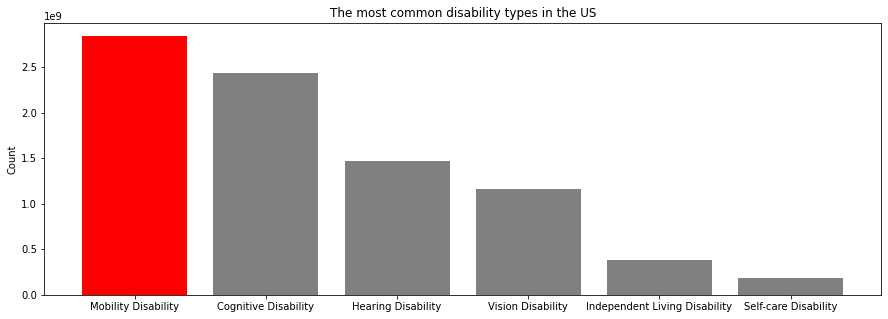

In [149]:
plt.figure(figsize=(15,5))
plt.bar(type_df.Stratification1,type_df.WeightedNumber,color=['red','grey','grey','grey','grey','grey'])
plt.title('The most common disability types in the US')
plt.ylabel('Count')
plt.show()

In [150]:
df.Stratification1.value_counts()

Any Disability                   203134
No Disability                    203134
Hearing Disability                29378
Cognitive Disability              29378
Vision Disability                 29378
Mobility Disability               29378
Self-care Disability               9600
Independent Living Disability      9600
Overall                            2560
Name: Stratification1, dtype: int64

In [151]:
Other_disability = ['Any Disability','Hearing Disability','Cognitive Disability','Vision Disability','Self-care Disability','Independent Living Disability','Overall']

In [152]:
df.Stratification1.replace(Other_disability,'Other Disability',inplace=True)

In [153]:
df.Stratification1.value_counts()

Other Disability       313028
No Disability          203134
Mobility Disability     29378
Name: Stratification1, dtype: int64

In [154]:
df = df[~df.LocationDesc.str.contains('HHS Region')]
df = df.query('LocationDesc != "United States, DC & Territories" & Stratification1 =="Mobility Disability"')
all_year_df = df.copy()


In [155]:
df.ResponseID.unique()

array(['AEROBIC01', 'AEROBIC02', 'AEROBIC03', 'AGE01', 'AGE02', 'AGE03',
       'BMI01', 'BMI02', 'BMI03', 'BMI04', 'DAYS01', 'DAYS02', 'DAYS03',
       'EDUCATE01', 'EDUCATE02', 'EDUCATE03', 'INCOME01', 'INCOME02',
       'INCOME03', 'INCOME04', 'INCOME05', 'JOB01', 'JOB02', 'JOB03',
       'JOB04', 'MARRIED01', 'MARRIED02', 'MARRIED03', 'MARRIED04',
       'PAGUIDE01', 'PAGUIDE02', 'PAGUIDE03', 'PAGUIDE04', 'PROVIDER01',
       'PROVIDER02', 'PROVIDER03', 'RACE01', 'RACE02', 'RACE03', 'RACE04',
       'RACE05', 'RACE06', 'RACE07', 'SEX01', 'SEX02', 'SLEEPHRS01',
       'SLEEPHRS02', 'SLEEPHRS03', 'SMOKE01', 'SMOKE02', 'SMOKE03',
       'VET1', 'VET2', 'YESNO01', 'YESNO02'], dtype=object)

In [156]:
df = df.rename({'Stratification1':'Disability'},axis=1)
all_year_df = df.copy()

In [157]:
df = df.query('Year == 2020')

In [158]:
age = ['AGE01','AGE02','AGE03']
income = ['INCOME01','INCOME02','INCOME03','INCOME04','INCOME05']
job = ['JOB01','JOB02','JOB03','JOB04']
marital = ['MARRIED01','MARRIED01','MARRIED01','MARRIED01']
race = ['RACE01','RACE02','RACE03','RACE04','RACE05','RACE06','RACE07']
gender = ['SEX01','SEX02']
BMI = ['BMI01','BMI02','BMI03','BMI04']
health_insur = ['PROVIDER01','PROVIDER02','PROVIDER03']

In [159]:
age_df = df[df.ResponseID.isin(age)]
age = age_df.groupby('Response').WeightedNumber.sum().reset_index()

In [160]:
income_df = df[df.ResponseID.isin(income)]
income = income_df.groupby('Response').WeightedNumber.sum().reset_index()
income = income.sort_values(by='Response',ascending=True)


In [161]:
job_df = df[df.ResponseID.isin(job)]
job = job_df.groupby('Response').WeightedNumber.sum().reset_index()
job = job.sort_values(by='WeightedNumber',ascending=False)


In [162]:
marital_df = df[df.ResponseID.isin(marital)]
marital = marital_df.groupby('Response').WeightedNumber.sum().reset_index()
marital = marital.sort_values(by='WeightedNumber',ascending=False)


In [163]:
race_df = df[df.ResponseID.isin(race)]
race = race_df.groupby('Response').WeightedNumber.sum().reset_index()
race = race.sort_values(by='WeightedNumber',ascending=False)



In [164]:
gender_df = df[df.ResponseID.isin(gender)]
gender = gender_df.groupby('Response').WeightedNumber.sum().reset_index()
gender = gender.sort_values(by='WeightedNumber',ascending=False)


In [165]:
BMI_df = df[df.ResponseID.isin(BMI)]
bmi = BMI_df.groupby('Response').WeightedNumber.sum().reset_index()
bmi = bmi.sort_values(by='WeightedNumber',ascending=False)

In [166]:
health_ins_df = df[df.ResponseID.isin(health_insur)]
health_ins = health_ins_df.groupby('Response').WeightedNumber.sum().reset_index()
health_ins = health_ins.sort_values(by='WeightedNumber',ascending=False)


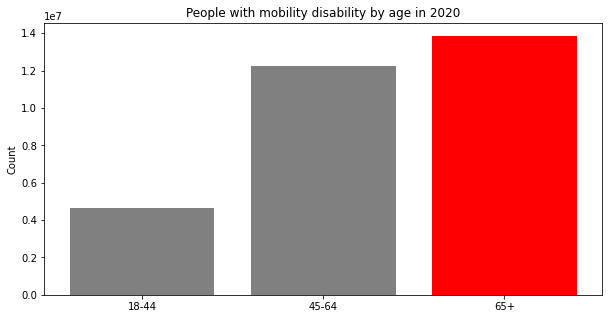

In [167]:
plt.figure(figsize=(10,5))
plt.bar(age.Response,age.WeightedNumber,color=['grey','grey','red'])
plt.ylabel('Count')
plt.title('People with mobility disability by age in 2020')
plt.show()

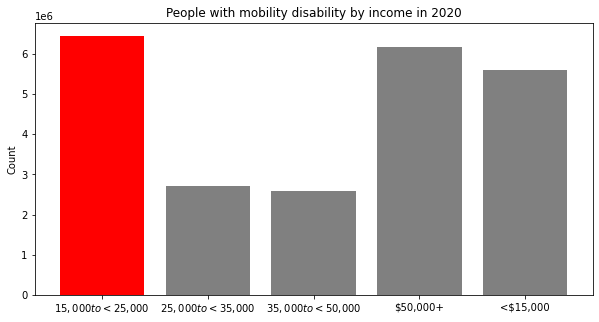

In [168]:
plt.figure(figsize=(10,5))
plt.bar(income.Response,income.WeightedNumber,color=['red','grey','grey','grey','grey'])
plt.ylabel('Count')
plt.title('People with mobility disability by income in 2020')
plt.show()

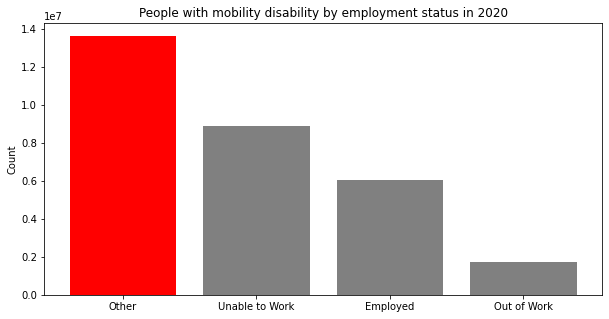

In [169]:
plt.figure(figsize=(10,5))
plt.bar(job.Response,job.WeightedNumber,color=['red','grey','grey','grey'])
plt.ylabel('Count')
plt.title('People with mobility disability by employment status in 2020')
plt.show()

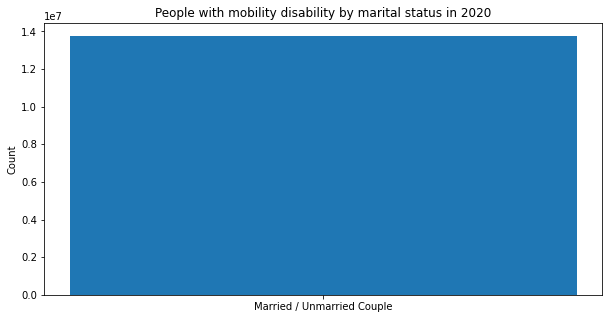

In [170]:
plt.figure(figsize=(10,5))
plt.bar(marital.Response,marital.WeightedNumber)
plt.ylabel('Count')
plt.title('People with mobility disability by marital status in 2020')
plt.show()

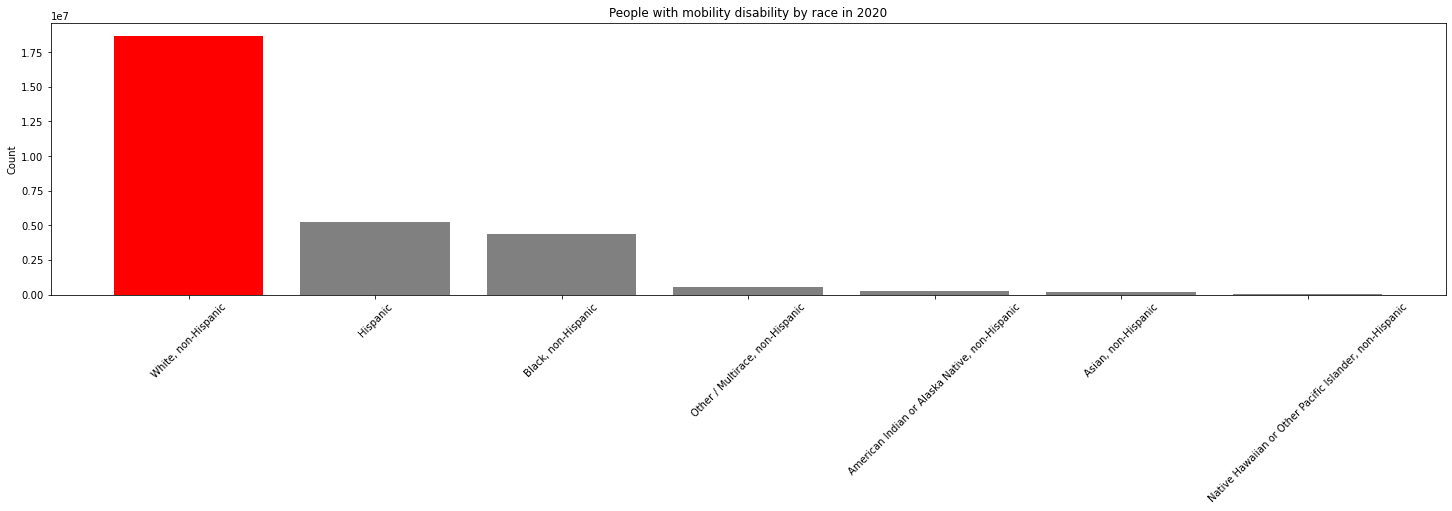

In [171]:
plt.figure(figsize=(25,5))
plt.bar(race.Response,race.WeightedNumber,color=['red','grey','grey','grey','grey','grey','grey'])
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('People with mobility disability by race in 2020')
plt.show()

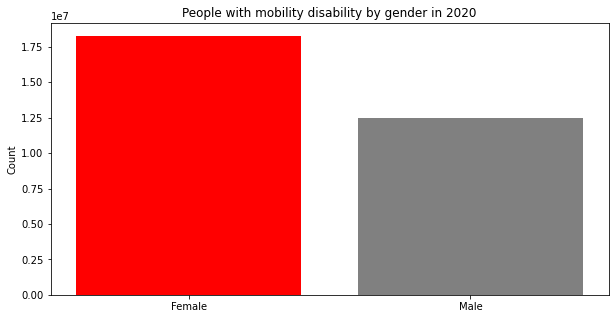

In [172]:
plt.figure(figsize=(10,5))
plt.bar(gender.Response,gender.WeightedNumber,color=['red','grey'])
plt.ylabel('Count')
plt.title('People with mobility disability by gender in 2020')
plt.show()

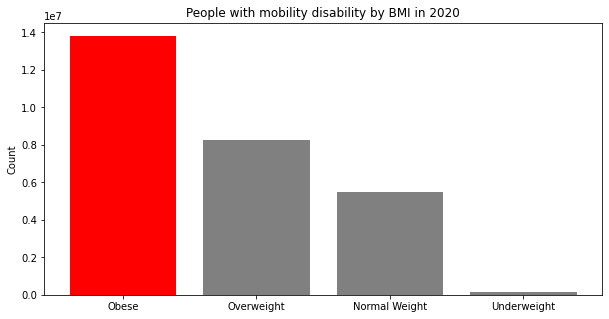

In [173]:
plt.figure(figsize=(10,5))
plt.bar(bmi.Response,bmi.WeightedNumber,color=['red','grey','grey','grey'])
plt.ylabel('Count')
plt.title('People with mobility disability by BMI in 2020')
plt.show()

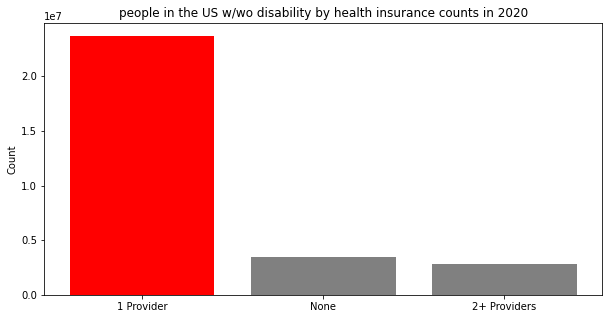

In [174]:
plt.figure(figsize=(10,5))
plt.bar(health_ins.Response,health_ins.WeightedNumber,color=['red','grey','grey'])
plt.ylabel('Count')
plt.title('people in the US w/wo disability by health insurance counts in 2020')
plt.show()

In [175]:
all_year_df = all_year_df.query('Disability=="Mobility Disability"')
all_year_df = all_year_df.sort_values(by='Year',ascending=True)
all_year_df = all_year_df.groupby(['LocationAbbr','Year']).WeightedNumber.sum().reset_index()

In [176]:
fig = px.choropleth(all_year_df, locations='LocationAbbr', locationmode='USA-states', color='WeightedNumber', 
                    color_continuous_scale=px.colors.sequential.RdPu, animation_frame='Year',scope="usa")
fig.show()

In [177]:
fig = px.choropleth(all_year_df[all_year_df.Year==2020], locations='LocationAbbr', locationmode='USA-states', color='WeightedNumber', 
                    color_continuous_scale=px.colors.sequential.RdPu, animation_frame='Year',scope="usa")
fig.show()